In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('/content/normTs.csv')

In [4]:
df.date_stamp= pd.to_datetime(df.date_stamp)

In [7]:
df['vends_per_txntr']= round(df.vends.astype('float')/df.users.astype('float'),3)

In [18]:
df.set_index('date_stamp', inplace=True)

In [19]:
df.sort_index(axis=0, ascending=True, inplace=True)

In [15]:
df.dtypes

date_stamp         datetime64[ns]
users                       int64
vend_amt                  float64
vends                       int64
vends_per_txntr           float64
dtype: object

In [20]:
df.head()

,users,vend_amt,vends,vends_per_txntr
date_stamp,,,,
2018-04-09,1,2.00,1,1.000
2018-04-12,2,72.75,47,23.500
2018-04-13,8,53.00,36,4.500
2018-04-16,4,33.25,19,4.750
2018-04-17,3,12.00,8,2.667


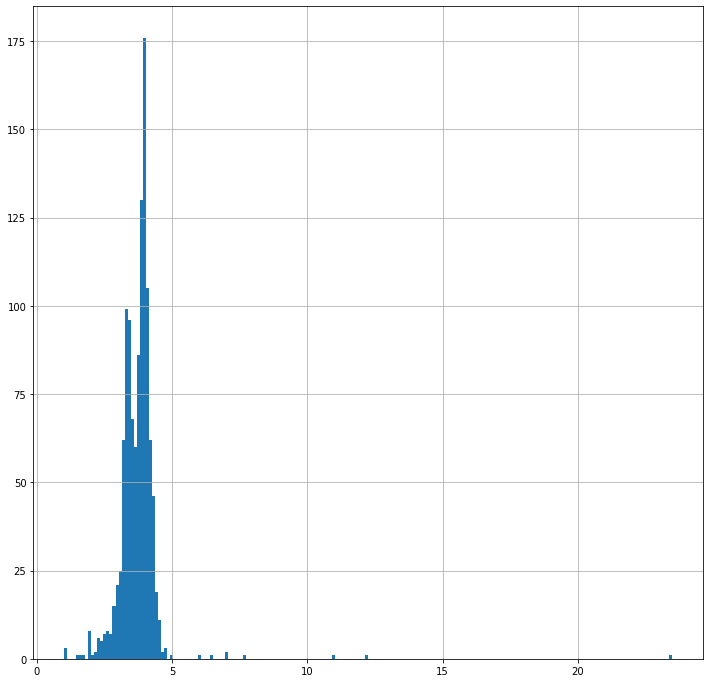

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (12, 12)
fig, ax1 = plt.subplots(figsize=a4_dims)
df.vends_per_txntr.hist(bins=200)

In [24]:
df.vends_per_txntr.describe(percentiles=[.05, .95])

count    1145.000000
mean        3.728294
std         0.858184
min         1.000000
5%          2.860200
50%         3.808000
95%         4.331200
max        23.500000
Name: vends_per_txntr, dtype: float64

In [50]:
mask = (df.index >= '2019-06-01') & (df.index <= '2021-06-01')

In [51]:
df1= df.loc[mask]

Text(0, 0.5, 'Vends per Transactor')

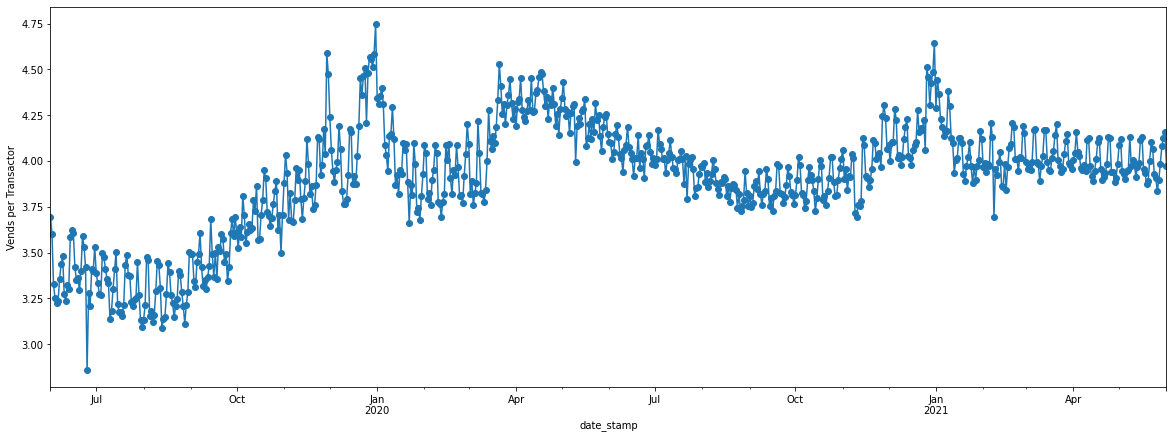

In [59]:
a4_dims = (20, 7)
fig, ax1 = plt.subplots(figsize=a4_dims)
df1.vends_per_txntr.plot(kind= 'line', ax=ax1, marker='o', linestyle='-')
ax1.set_ylabel('Vends per Transactor')

In [91]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['WeekNum'] = df1.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week an

In [67]:
week_map={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [69]:
df1['DoW']=df1.index.dayofweek.map(week_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
df1

,users,vend_amt,vends,vends_per_txntr,Year,Month,Weekday Name,DoW,WeekNum
date_stamp,,,,,,,,,
2019-06-01,2449,13892.22,9055,3.697,2019,6,22,Saturday,22
2019-06-02,3312,18315.05,11935,3.604,2019,6,22,Sunday,22
2019-06-03,2461,12624.97,8187,3.327,2019,6,23,Monday,23
2019-06-04,2135,10751.60,6941,3.251,2019,6,23,Tuesday,23
2019-06-05,2215,11065.90,7140,3.223,2019,6,23,Wednesday,23
...,...,...,...,...,...,...,...,...,...
2021-05-28,58329,361051.25,232522,3.986,2021,5,21,Friday,21
2021-05-29,56845,363468.19,231999,4.081,2021,5,21,Saturday,21
2021-05-30,60680,393828.75,250220,4.124,2021,5,21,Sunday,21


Text(0.5, 1.0, 'vends_per_txntr')

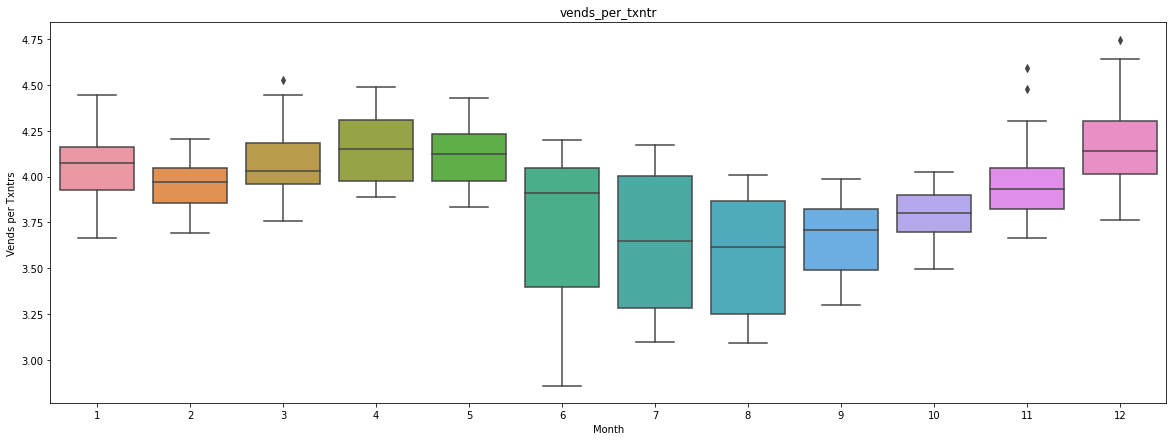

In [62]:
a4_dims = (20, 7)
fig, ax1 = plt.subplots(figsize=a4_dims)
name= 'vends_per_txntr'
sns.boxplot(data=df1, x='Month', y=name, ax=ax1)
ax1.set_ylabel('Vends per Txntrs')
ax1.set_title(name)

Text(0.5, 1.0, 'vends_per_txntr')

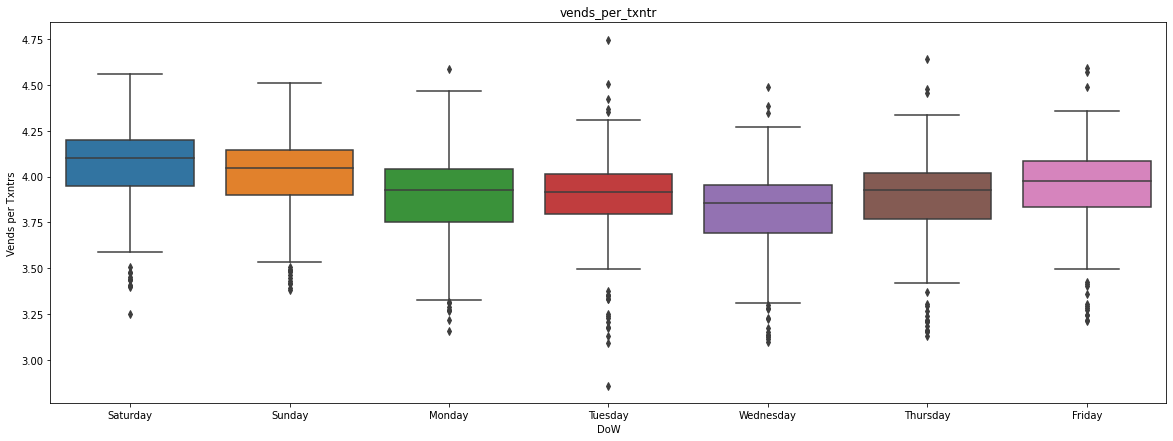

In [75]:
a4_dims = (20, 7)
fig, ax1 = plt.subplots(figsize=a4_dims)
name= 'vends_per_txntr'
sns.boxplot(data=df1, x='DoW', y=name, ax=ax1)
ax1.set_ylabel('Vends per Txntrs')
ax1.set_title(name)

In [87]:
vpt_wkly = df1[name].resample('W').mean()
vpt_7d= df1[name].rolling(7, center=True).mean()
vpt_15d= df1[name].rolling(15, center=True).mean()
vpt_365d= df1[name].rolling(window=365, center=True, min_periods=360).mean()
vpt_30d = df1[name].rolling(window=30, center=True, min_periods=10).mean()
vpt_90d = df1[name].rolling(window=90, center=True, min_periods=60).mean()

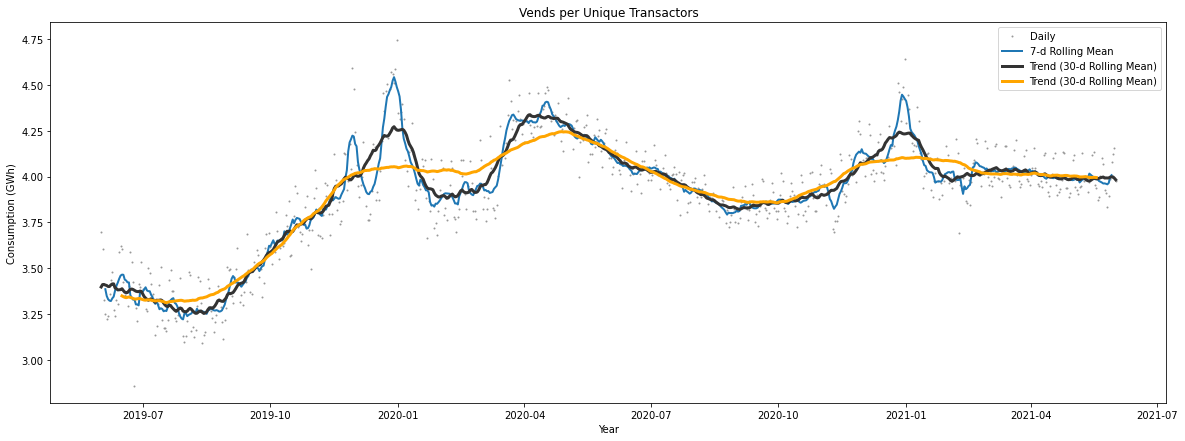

In [110]:
a4_dims = (20, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax.plot(df1[name], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(vpt_7d, linewidth=2, label='7-d Rolling Mean')
ax.plot(vpt_30d, color='0.2', linewidth=3, label='Trend (30-d Rolling Mean)')
ax.plot(vpt_90d, color='orange', linewidth=3, label='Trend (30-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Vends per Unique Transactors');

In [107]:
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [111]:
df3=pd.crosstab(index=df1.Month,  columns= df1.DoW, values= df1.vends_per_txntr, aggfunc=('mean')).loc[:, days]

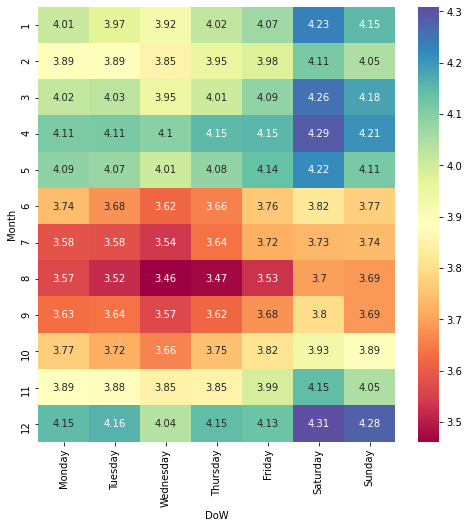

In [123]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df3, annot= True, fmt='.3g', cmap= 'Spectral')

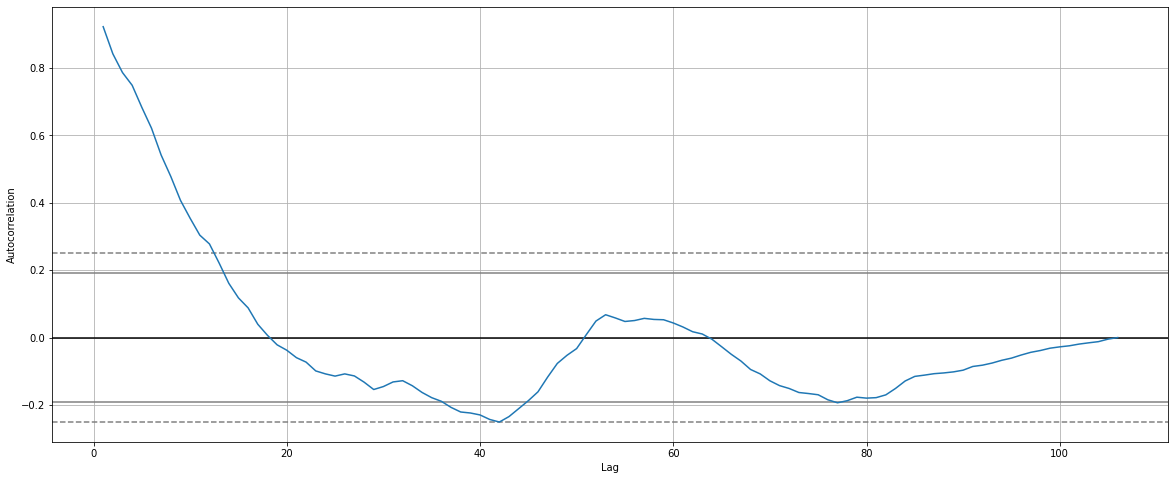

In [125]:
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
pd.plotting.autocorrelation_plot(df1.vends_per_txntr.resample("W").median(), ax=ax)

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [156]:
decompose_result = seasonal_decompose(df1.vends_per_txntr, model="additive")

In [158]:
# a4_dims = (20, 8)
# fig, ax = plt.subplots(figsize= a4_dims)
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
# decompose_result.plot()

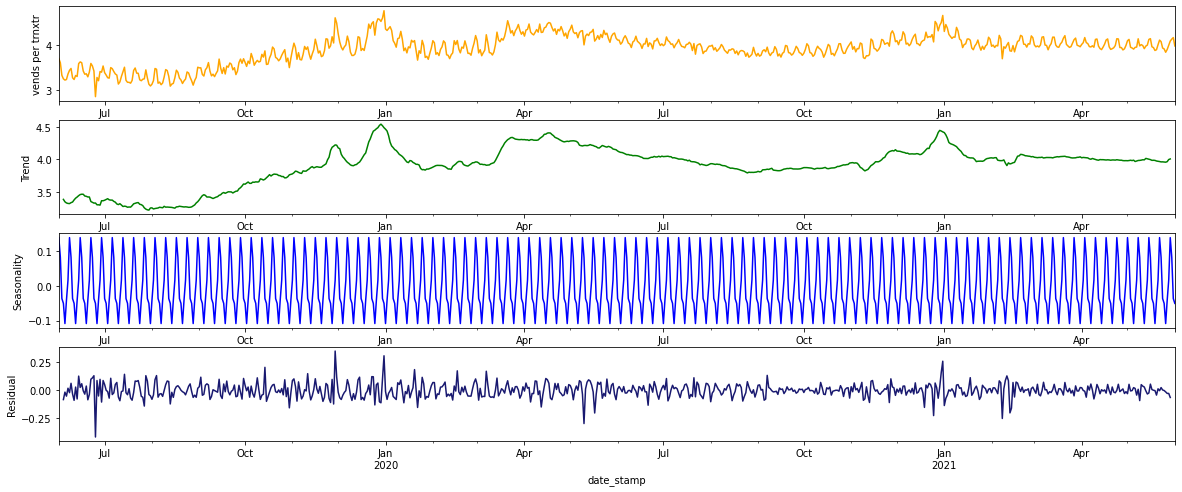

In [179]:
a4_dims = (20, 8)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize= a4_dims)
# fig, ax = plt.subplots(figsize= a4_dims)
df1.vends_per_txntr.plot(kind='line', ax=axes[0], color='orange', ylabel='vends per trnxtr')
trend.plot(kind='line', ax=axes[1], color='green', ylabel='Trend')
seasonal.plot(kind='line', ax=axes[2], color='blue', ylabel='Seasonality')
residual.plot(kind='line', ax=axes[3], color='midnightblue', ylabel='Residual')
plt.show()

In [170]:
sf=pd.concat([df1.vends_per_txntr, trend, seasonal, residual], axis=1).dropna()

In [172]:
sf.columns= ['vends_per_txntr', 'trend', 'seasonal', 'residual']

In [180]:
gap=sf.vends_per_txntr- sf.trend- sf.seasonal- sf.residual

In [182]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


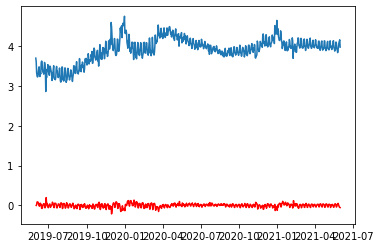

In [188]:
model = ARIMA(df1.vends_per_txntr, order=(1,1,1))
results = model.fit(disp=-1)
plt.plot(df1.vends_per_txntr)
plt.plot(results.fittedvalues, color='red')

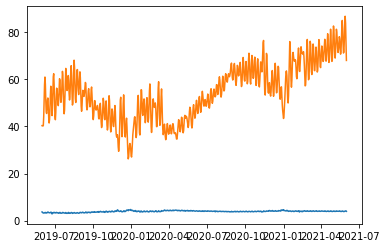

In [186]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df1.vends_per_txntr.iloc[0], index=df1.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1.vends_per_txntr)
plt.plot(predictions_ARIMA)

- Extend the diagram to include previous periods
- Statistical significance test
- BDEX "awareness" test
- Dollar: what's the $ impact of the campaign
- Epics> Tasks for Anil
- Test 1,2,3,4 Data Science
- 